In [1]:
#import necessary datasets  
import xarray as xr
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#%matplotlib ipympl #enables interactive features
#%load_ext autoreload #reload the modules before execution of the user code. Saves time
#%autoreload 2 #reloading the modules before execution   

In [3]:
import cartopy
import cmocean
import cartopy.crs as ccrs

In [4]:
file_name = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2013_surface.zarr'
ds = open_dataset(file_name, select = "temperature_0")

In [5]:
year = 2013
path_nk = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{year}/'
file_nk = f'norkyst800-{year}0101.nc'
nk = xr.open_dataset(path_nk+file_nk)

In [6]:
ds

select temperature_0
zarr ...


Info about the zarr datset from terminal: 
The variables used in the zarr dataset is:

1. Uwind_eastward
2. Vwind_northward
3. h 
4. salinity_0
5. sea_mask
6. temperature_0
7. u_eastward_0
8. ubar_eastward
9. v_northward_0
10. vbar_northward
11. zeta

Frequency is 1hr and the date is 01.01.2013 00:00 - 31.12.2013 23:00


In [7]:
#Understanding the code by Matheusz 
"""
#Defining subplots and the projection type we want. To see more projection types, access: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html. 
fig, ax = plt.subplots(figsize = (10,15), subplot_kw={"projection": ccrs.NorthPolarStereo()})
im = ax.scatter(nk.lon, nk.lat, c = nk.temperature.isel(time=0, s_rho = -1), s = 2, vmin = 2, vmax = 10, cmap=cmocean.cm.haline, transform = ccrs.PlateCarree()) 
#s is the marker size, cmocean colorbars are found at: https://matplotlib.org/cmocean/
#Transform to the right map projection?? 
ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black") #adding land features to the plot
cax = fig.add_axes([ax.get_position().x1+0.25, ax.get_position().y0, 0.025, ax.get_position().height]) #placing the colorbar
cbar = fig.colorbar(im, ax=ax, cax = cax, extend = "both")
cbar.ax.set_title("Temp", fontsize = 14)
#not sure why the colorbar wont show
"""

'\n#Defining subplots and the projection type we want. To see more projection types, access: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html. \nfig, ax = plt.subplots(figsize = (10,15), subplot_kw={"projection": ccrs.NorthPolarStereo()})\nim = ax.scatter(nk.lon, nk.lat, c = nk.temperature.isel(time=0, s_rho = -1), s = 2, vmin = 2, vmax = 10, cmap=cmocean.cm.haline, transform = ccrs.PlateCarree()) \n#s is the marker size, cmocean colorbars are found at: https://matplotlib.org/cmocean/\n#Transform to the right map projection?? \nax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black") #adding land features to the plot\ncax = fig.add_axes([ax.get_position().x1+0.25, ax.get_position().y0, 0.025, ax.get_position().height]) #placing the colorbar\ncbar = fig.colorbar(im, ax=ax, cax = cax, extend = "both")\ncbar.ax.set_title("Temp", fontsize = 14)\n#not sure why the colorbar wont show\n'

In [8]:
#now for the zarr files for 2013
"""
for i in [0,4,8,12,24,28,32,36]: #tid blir lik i her
    fig,ax = plt.subplots(figsize = (10,15), subplot_kw={"projection": ccrs.NorthPolarStereo()})
    im = ax.scatter(ds.longitudes, ds.latitudes, c = ds[i,0,0,:], s=2, vmin = 2, vmax = 10, cmap = cmocean.cm.haline, transform = ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")
    cbar.ax.set_title("Temp", fontsize = 14)
    ax.set_title(f'+ {i}h from {year} - 01.01T000:00:00')
"""

'\nfor i in [0,4,8,12,24,28,32,36]: #tid blir lik i her\n    fig,ax = plt.subplots(figsize = (10,15), subplot_kw={"projection": ccrs.NorthPolarStereo()})\n    im = ax.scatter(ds.longitudes, ds.latitudes, c = ds[i,0,0,:], s=2, vmin = 2, vmax = 10, cmap = cmocean.cm.haline, transform = ccrs.PlateCarree())\n    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")\n    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])\n    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")\n    cbar.ax.set_title("Temp", fontsize = 14)\n    ax.set_title(f\'+ {i}h from {year} - 01.01T000:00:00\')\n'

In [9]:
file2 = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2024_surface.zarr'
ds_2024 = open_dataset(file2, select = "temperature_0")

In [ ]:
#lager om til en funksjon for videre bruk
def temp(ds_file, year, time_indx):
    fig,ax = plt.subplots(figsize = (8,10), subplot_kw={"projection": ccrs.NorthPolarStereo()})
    im = ax.scatter(ds_file.longitudes, ds_file.latitudes, c = ds_file[time_indx,0,0,:], s=2, vmin = 2, vmax = 10, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")
    cbar.ax.set_title("Temp", fontsize = 14)
    ax.set_title(f'+ {time_indx}h from {year} - 01.01T000:00:00')
    plt.show()

for time_indx in [0,8,24,32,42]:
    temp(ds_file=ds_2024,year=2024, time_indx=time_indx)


'\n#lager om til en funksjon for videre bruk\ndef temp(ds_file, year, time_indx):\n    fig,ax = plt.subplots(figsize = (8,10), subplot_kw={"projection": ccrs.NorthPolarStereo()})\n    im = ax.scatter(ds_file.longitudes, ds_file.latitudes, c = ds_file[time_indx,0,0,:], s=2, vmin = 2, vmax = 10, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree())\n    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")\n    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])\n    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")\n    cbar.ax.set_title("Temp", fontsize = 14)\n    ax.set_title(f\'+ {time_indx}h from {year} - 01.01T000:00:00\')\n    plt.show()\n\nfor time_indx in [0,8,24,32,42]:\n    temp(ds_file=ds_2024,year=2024, time_indx=time_indx)\n'

In [ ]:
for time_indx in [0,8,24,32,42]:
    temp(ds_file=ds,year=2013, time_indx=time_indx)

'for time_indx in [0,8,24,32,42]:\n    temp(ds_file=ds,year=2013, time_indx=time_indx)'

In [12]:
def salinity(ds_file, year, time_indx):
    fig,ax = plt.subplots(figsize = (8,10), subplot_kw={"projection": ccrs.NorthPolarStereo()})
    im = ax.scatter(ds_file.longitudes, ds_file.latitudes, c = ds_file[time_indx,0,0,:], s=2, vmin = 30, cmap = cmocean.cm.haline, transform = ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")
    cbar.ax.set_title("Salinity", fontsize = 14)
    ax.set_title(f'+ {time_indx}h from {year} - 01.01T000:00:00')
    plt.show()

In [13]:
ds_sal_2013 = open_dataset(file_name, select = "salinity_0")
ds_sal_2024 = open_dataset(file2, select = "salinity_0")

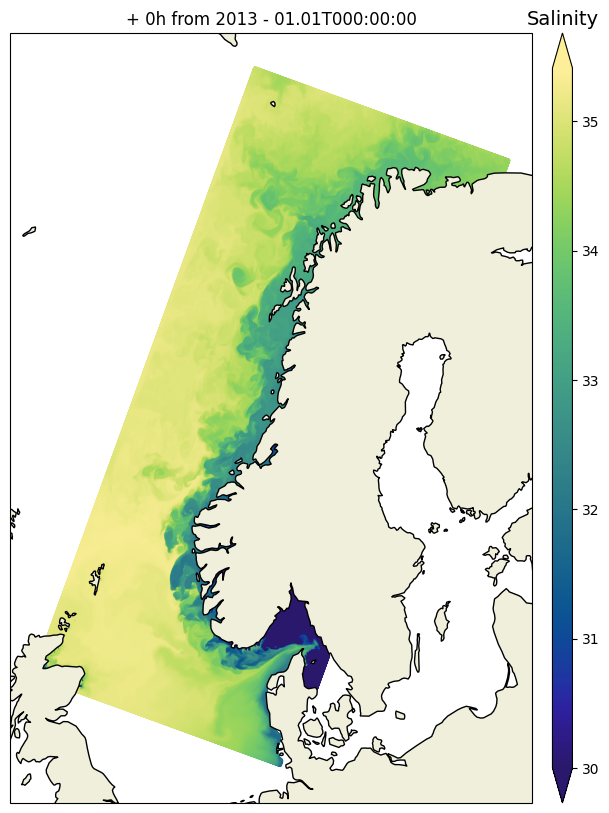

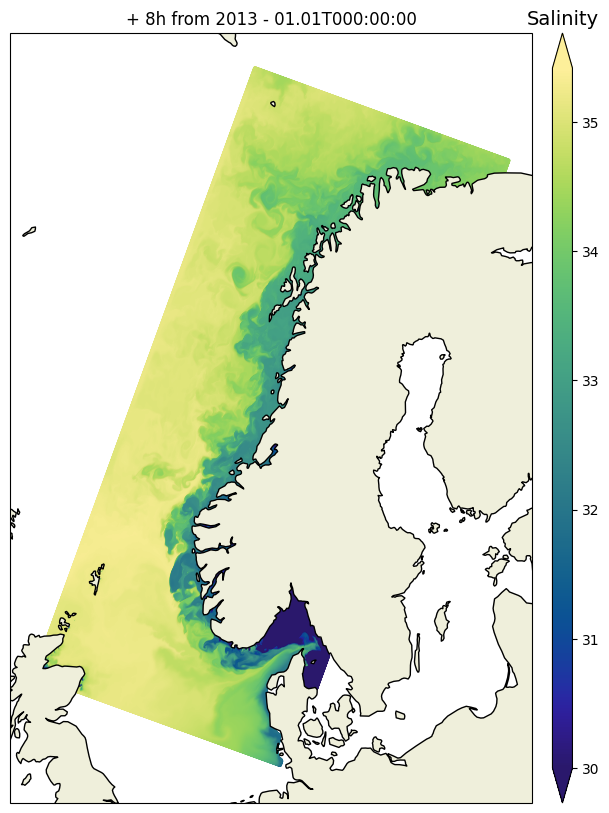

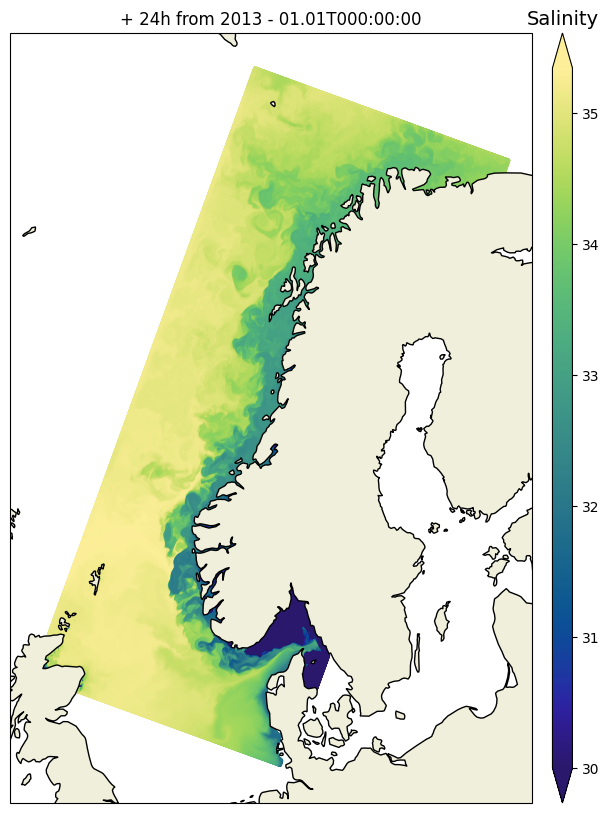

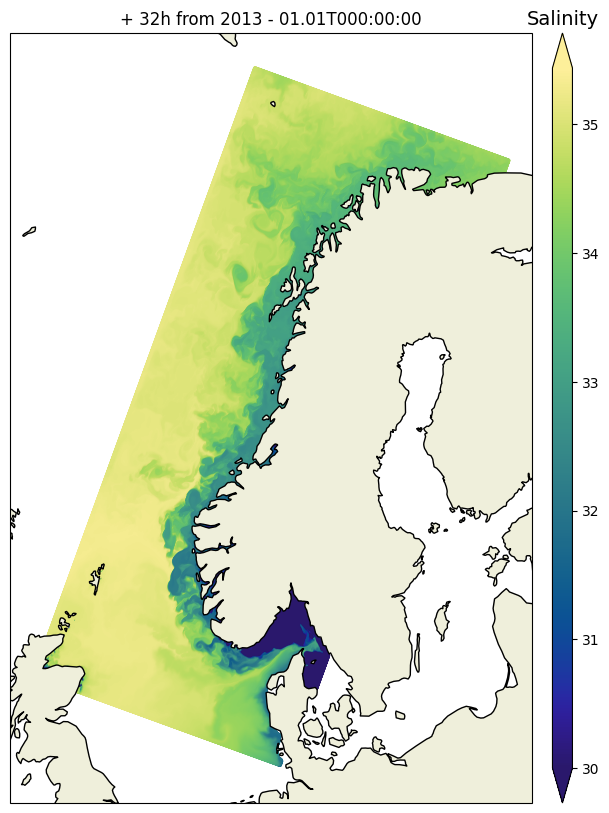

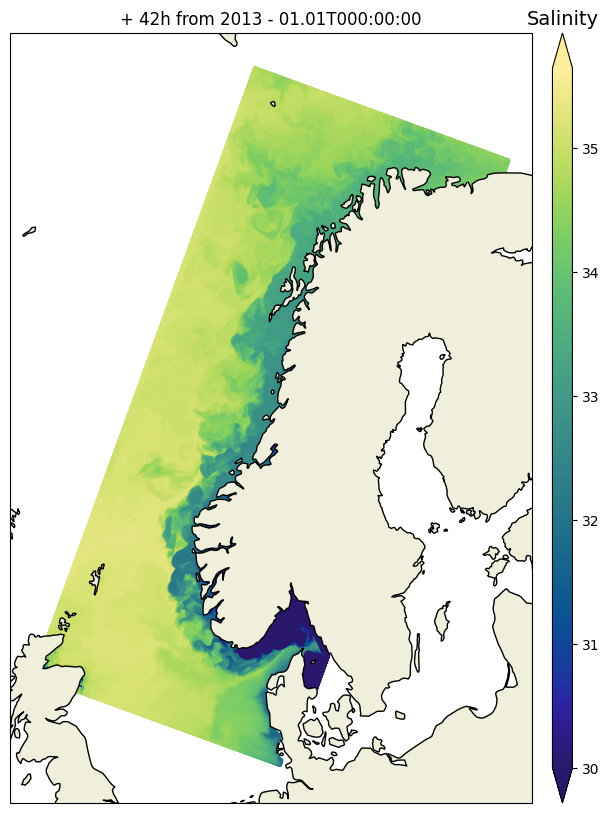

In [14]:
for time_indx in [0,8,24,32,42]:
    salinity(ds_sal_2013, year=2013, time_indx=time_indx)

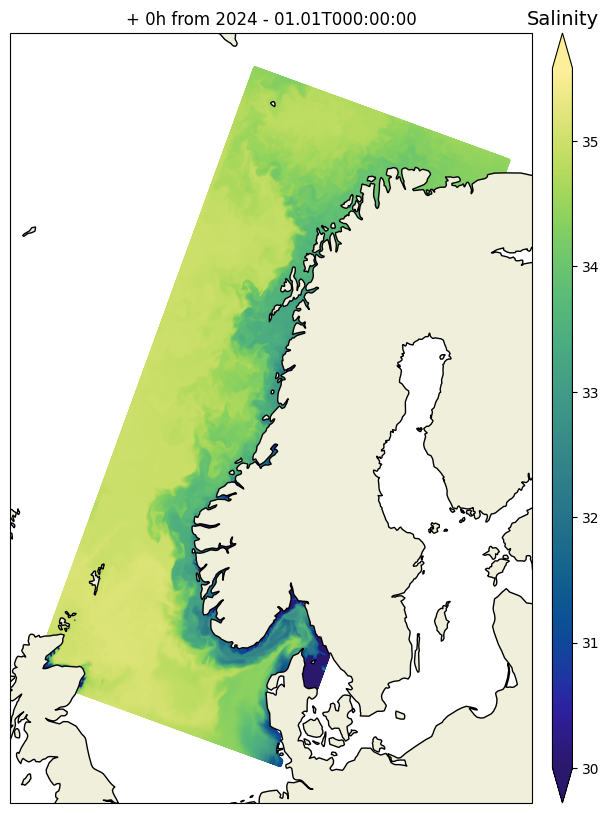

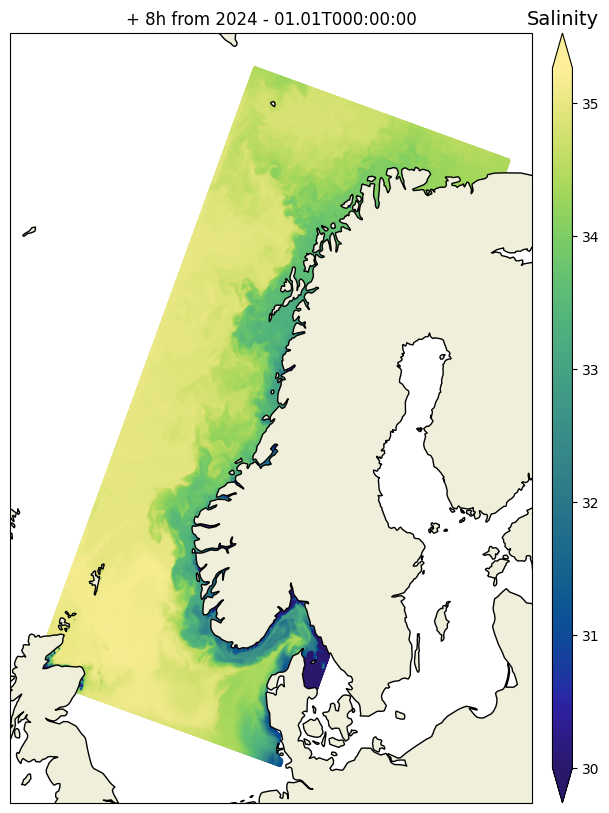

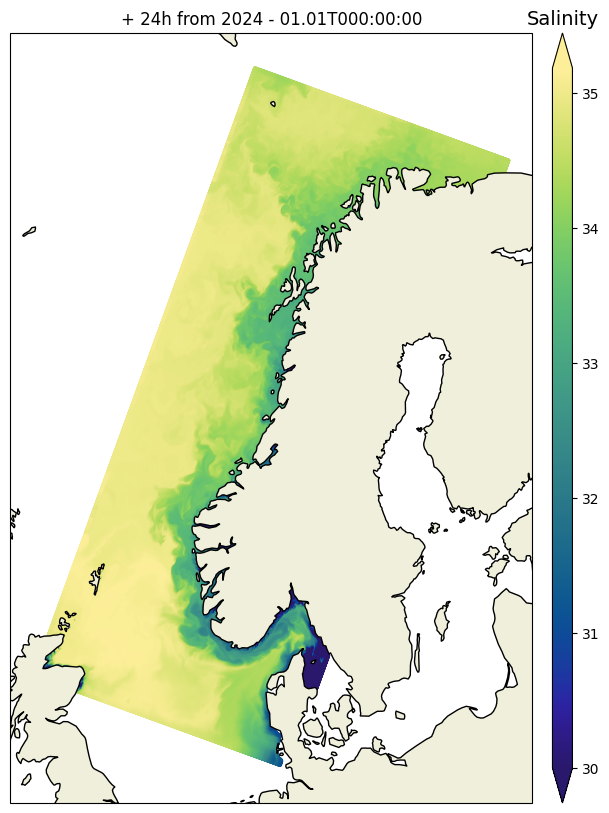

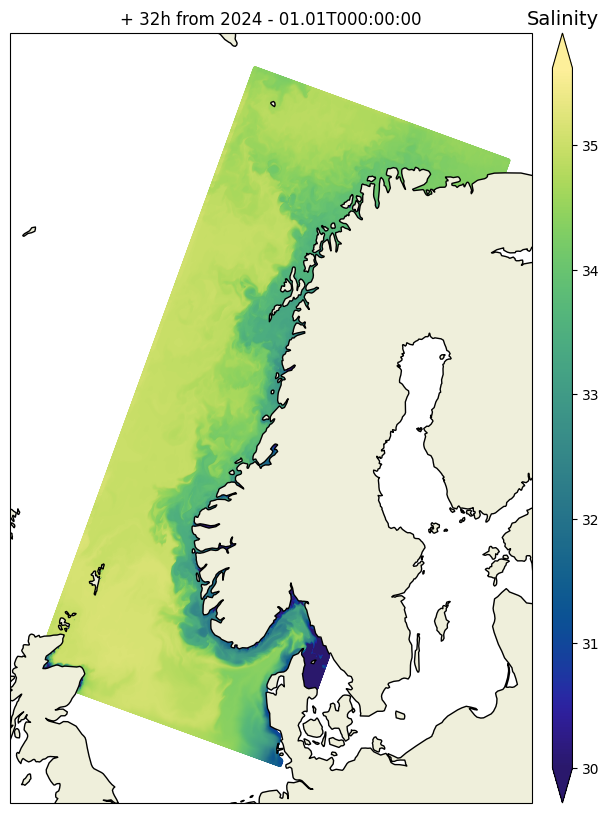

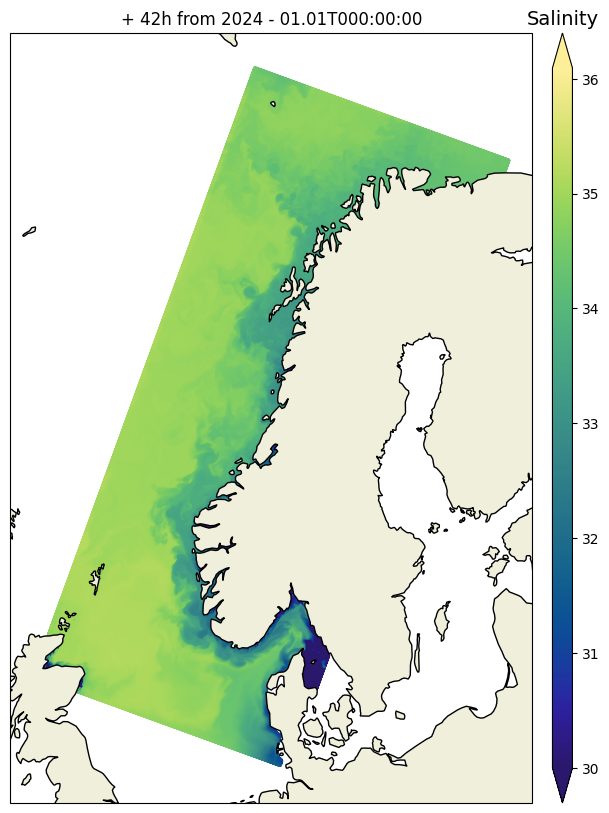

In [15]:
for time_indx in [0,8,24,32,42]:
    salinity(ds_file=ds_sal_2024, year=2024, time_indx=time_indx)